In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown

In [2]:
data =  pd.read_csv("Weater_Data.csv")

In [3]:
data.head()

,Janurary,Temperature_Max(°F),Temperature_Avg,Temperature_Min,pm25,pm10,o3,no2,so2,co,Humidity_Max(%),Humidity_AVg(%),Humidity_Min(%),Wind_Speed_Max(mph),Wind_Speed_Avgmph),Wind_Speed_Min(mph),Precipitation (in)
0,1,54,50.5,47,152,101,41,17,15,13,94,89.4,86,9,2.9,0,0.01
1,2,60,50.3,37,167,352,22,13,22,21,93,84.6,60,20,4.4,0,0.77
2,3,37,30.4,24,376,161,33,8,13,19,67,56.5,45,14,8.9,5,0.00
3,4,37,29.2,21,235,300,37,16,9,16,72,56.6,46,14,6.5,0,0.00
4,5,41,33.2,25,344,160,22,18,5,23,85,72.7,60,10,4.8,0,0.00


In [4]:
data.isnull().sum()

Janurary               0
Temperature_Max(°F)    0
Temperature_Avg        0
Temperature_Min        0
pm25                   0
pm10                   0
o3                     0
no2                    0
so2                    0
 co                    0
Humidity_Max(%)        0
Humidity_AVg(%)        0
Humidity_Min(%)        0
Wind_Speed_Max(mph)    0
Wind_Speed_Avgmph)     0
Wind_Speed_Min(mph)    0
Precipitation (in)     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Janurary             31 non-null     int64  
 1   Temperature_Max(°F)  31 non-null     int64  
 2   Temperature_Avg      31 non-null     float64
 3   Temperature_Min      31 non-null     int64  
 4   pm25                 31 non-null     int64  
 5   pm10                 31 non-null     int64  
 6   o3                   31 non-null     int64  
 7   no2                  31 non-null     int64  
 8   so2                  31 non-null     int64  
 9    co                  31 non-null     int64  
 10  Humidity_Max(%)      31 non-null     int64  
 11  Humidity_AVg(%)      31 non-null     float64
 12  Humidity_Min(%)      31 non-null     int64  
 13  Wind_Speed_Max(mph)  31 non-null     int64  
 14  Wind_Speed_Avgmph)   31 non-null     float64
 15  Wind_Speed_Min(mph)  31 non-null     int64

In [6]:
def plot_correlation(variable):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[variable], y=data['pm25'], color='blue')
    plt.title(f'Correlation between {variable} and PM2.5 Levels')
    plt.xlabel(variable)
    plt.ylabel('PM2.5 Levels')
    plt.grid(True)
    plt.show()

In [7]:
# Create dropdown menu options
dropdown_options = data.columns.tolist()

In [8]:
interact(plot_correlation, variable=Dropdown(options=dropdown_options, description='Variable:'))

interactive(children=(Dropdown(description='Variable:', options=('Janurary', 'Temperature_Max(°F)', 'Temperatu…

<function __main__.plot_correlation(variable)>

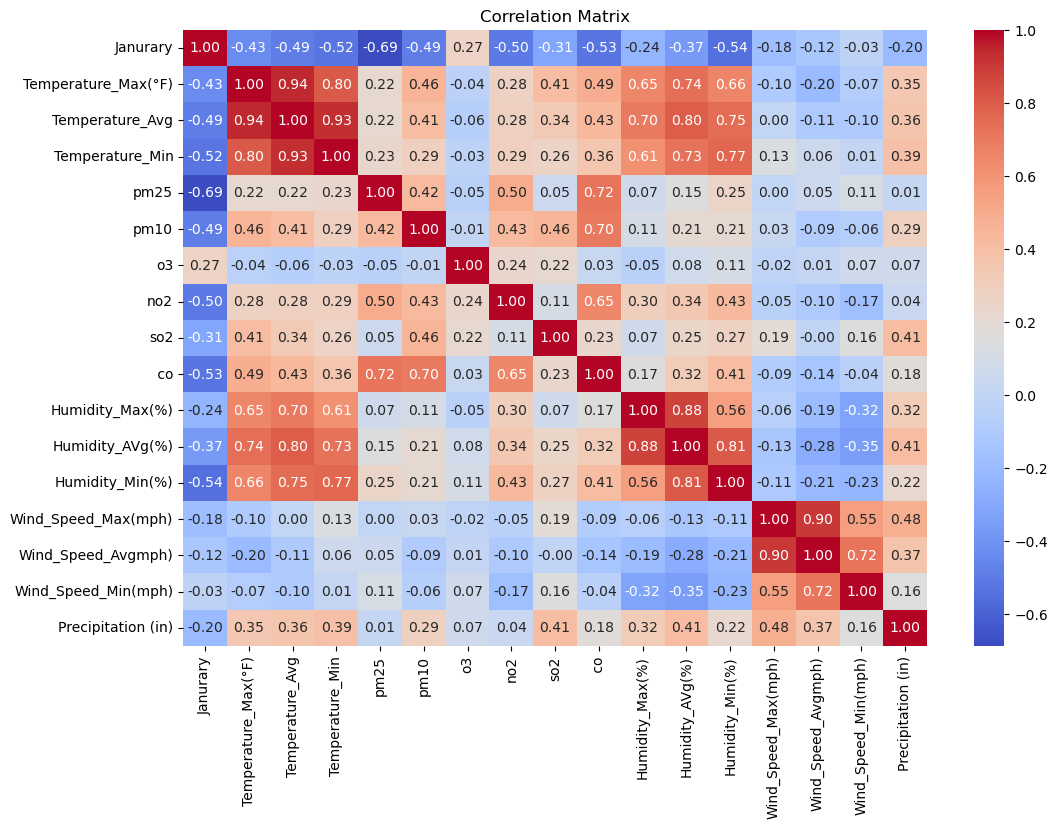

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
def plot_line_graph(variable):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[variable], marker='*',markerfacecolor = 'red', linestyle='-', color='pink', label=variable)
    plt.title(f'{variable} Over Time')
    plt.xlabel('Day')
    plt.ylabel(variable)
    plt.legend()
    plt.grid(True)
    plt.show()


line_dropdown_options = data.columns.tolist()
interact(plot_line_graph, variable=Dropdown(options=line_dropdown_options, description='Variable:'))


interactive(children=(Dropdown(description='Variable:', options=('Janurary', 'Temperature_Max(°F)', 'Temperatu…

<function __main__.plot_line_graph(variable)>

In [11]:
def plot_line_graph(month):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Janurary'], data['pm25'], marker='o',markerfacecolor = 'yellow', color='blue', label='PM2.5 Levels')
    plt.scatter(month, data.loc[month-1, 'pm25'], color='red', s=100, label='Selected Month')
    plt.title('PM2.5 Levels Over Time')
    plt.xlabel('Day of January')
    plt.ylabel('PM2.5 Levels')
    plt.xticks(range(1, 32))
    plt.grid(True)
    plt.legend()


    significant_dates = data[data['pm25'] > 200]['Janurary'].tolist()
    for date in significant_dates:
        plt.axvline(x=date, color='black', linestyle='--', alpha=0.2)
        plt.text(date, 200, 'High Pollution', rotation=90, color='gray', ha='center', va='bottom')

    plt.show()


dropdown_month = range(1, 32)


interact(plot_line_graph, month=Dropdown(options=dropdown_month, description=' Day :'))


interactive(children=(Dropdown(description=' Day :', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

<function __main__.plot_line_graph(month)>